# Improving a Machine Learning Model

Improving a machine learning model is crucial to ensure its effectiveness. Just like any tool, a model's performance can degrade over time or underperform from the start. By continuously refining the model using techniques like data cleaning and algorithm adjustments, you can enhance its accuracy and generalizability. This leads to better decision-making, more reliable predictions, and ultimately, greater value from the entire machine learning system.

- [Baseline model/predictions](#baseline-modelpredictions)
- [Ways of trying to improve a model](#ways-of-trying-to-improve-a-model)
  - [From a data perspective](#from-a-data-perspective)
  - [From a model perspective](#from-a-model-perspective)
  - [Tuning Hyperparameters](#tuning-hyperparameters)
- [Adjusting Hyperparameters by hand](#adjusting-hyperparameters-by-hand)
- [Hyperparameter tuning with RandomizedSearchCV](#hyperparameter-tuning-with-randomizedsearchcv)
- [Hyperparameter tuning with GridSearchCV](#hyperparameter-tuning-with-gridsearchcv)
- [Comparing Metrics](#comparing-metrics)

## Baseline model/predictions

The first model and the first predictions are called **_baseline_**. A baseline model in machine learning is a rudimentary model establishing a performance benchmark. Its predictions serve as a reference for evaluating more complex models, highlighting if their advancements truly improve accuracy or just overfit the data.

## Ways of trying to improve a model

When trying to improve a model, there are a few key steps in the thought process.

### From a data perspective

The first one is to think from a data perspective, meaning, from the data, how can this data be better for the model. This can basically be summed up in two things, "Could we get more data?", generally, the more data, the better, and "could we improve our data?".

### From a model perspective

From a model perspective, there are two main ways to improve the model, the first is "is there a better model we could use?", given that to find the ideal model for a specific problem, not always the first one is the ideal one, therefore this is a valid question to make a better machine learning model. The second one would be "Could we improve the model?", after determining whether the better model is being used, we then turn our heads to improving this already existing model, this can be done by tuning the models hyperparameters.

### Tuning Hyperparameters

Hyperparameters are the control knobs that steer the learning process. Unlike a model's parameters, which are learned from data, hyperparameters are set before training.

They influence how the model learns from the data, impacting factors like its complexity and learning rate. By adjusting hyperparameters, we can fine-tune the model's performance, aiming to achieve optimal results on a specific task.

There are a few ways a model's hyperparameters can be adjusted. The first one is to adjust them by hand, setting each one individually and evaluating the model. The second one is to do it randomly set them using sklearn's `RandomSearchCV`. Finally the third one would be to use sklearn's `GridSearchCV` to exhaustively try every possible combination of hyperparameters.


In [22]:
# Importing packages

# Utilities
import numpy as np
import pandas as pd

# Models
from sklearn.ensemble import RandomForestClassifier

# Pre-processing
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Importing dataset
heart_disease = pd.read_csv('../datasets/heart-disease.csv')

In [4]:
clf = RandomForestClassifier()

In [5]:
# Getting model's parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Adjusting Hyperparameters by hand

Instead of simply splitting the data into test and training data, we split the data to another type 'validation'. Instead of doing 80-20 split, do a 70-15-15 split

We're going to try and adjust:

- `max_depth`
- `max_features`
- `min_samples_leaf`
- `min_samples_split`
- `n_estimators`


In [6]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:
# Creating evaluate_preds function
def evaluate_preds(y_true, y_preds) -> dict:
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification
    """
    accuracy = accuracy_score(y_true=y_true, y_pred=y_preds)
    precision = precision_score(
        y_true=y_true,
        y_pred=y_preds,
    )
    recall = recall_score(y_true=y_true, y_pred=y_preds)
    f1 = f1_score(y_true=y_true, y_pred=y_preds)

    metric_dict: dict[str, float]= {
        'accuracy': float(f'{accuracy:.2f}'),
        'precision': float(f'{precision :.2f}'),
        'recall': float(f'{recall:.2f}'),
        'f1': float(f'{f1:.2f}'),
    }
    
    print(f'Accuracy: {metric_dict['accuracy']}')
    print(f'Precision: {metric_dict['precision']}')
    print(f'Recall: {metric_dict['recall']}')
    print(f'f1: {metric_dict['f1']}')

    return metric_dict

In [35]:
# Creating model

# Setting random seed
np.random.seed(42)

# Shuffling the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Separating the data into features and target
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Splitting the data into training, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled))
validation_split = round(train_split + 0.15 * len(heart_disease_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_validation, y_validation = (
    X[train_split:validation_split],
    y[train_split:validation_split],
)
X_test, y_test = X[validation_split:], y[:validation_split]

# Instantiating model
clf = RandomForestClassifier()

# Training/fitting model
clf.fit(X_train, y_train)

# Predicting data
y_preds = clf.predict(X_validation)

# Evaluating the classifier on validation set
baseline_metrics = evaluate_preds(y_validation, y_preds)

Accuracy: 0.82
Precision: 0.81
Recall: 0.88
f1: 0.85


## Hyperparameter tuning with RandomizedSearchCV

RandomizedSearchCV is an efficient approach to tune a machine learning model. It randomly samples a fixed number of hyperparameter configurations from predefined distributions. These configurations are then evaluated using cross-validation to assess their performance on the data. This random sampling allows the search to explore a broader range of hyperparameter values while requiring fewer evaluations. Ultimately, RandomizedSearchCV delivers the best hyperparameter combination found during the random search process.

Some of the used parameters to be used are `param_distributions` (that define what are the parameters to be tuned), `n_iter` (that controls the number of hyperparameter configurations that are randomly sampled and evaluated), `cv` (that define the number of cross-validation splits).


In [36]:
# Creating dict with hyperparameters to be tuned
grid = {
    'n_estimators': [10, 100, 200, 500, 500, 1000, 1200],
    'max_depth': [None, 5, 10, 20, 30],
    'max_features': ['log2', 'sqrt'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
}

# Setting seed
np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiating model
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(
    estimator=clf, param_distributions=grid, n_iter=10, cv=5, verbose=2
)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500, 500,
                                                         1000, 1200]},
                   verbose=2)

In [37]:
# Getting the model's ideal parameters
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None}

In [38]:
# Making predictions with the ideal hyperparameters
rs_preds = rs_clf.predict(X_test)

# Evaluating predictions
rs_metric = evaluate_preds(y_test, rs_preds)

Accuracy: 0.85
Precision: 0.79
Recall: 0.93
f1: 0.85


## Hyperparameter tuning with GridSearchCV

GridSearchCV, a hyperparameter tuning powerhouse in scikit-learn, helps you find the sweet spot for you machine learning model's hyperparameters. These are the dials you adjust before training, impacting how the model learns. It works by meticulously evaluating all possible combinations within a defined grid of values for each hyperparameter. Using cross-validation for each combination ensures robust assessment, not swayed by chance data splits. Finally, GridSearchCV presents the hyperparameter that delivered the best performance based on your chosen scoring metric. This systematic search empowers you to fine tune your model and squeeze out its optimal performance.


In [39]:
# Creating new dict with sets of hyperparameters
grid_2 = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None],
    'max_features': ['log2', 'sqrt'],
    'min_samples_split': [6],
    'min_samples_leaf': [1, 2],
}

# Setting random seed
np.random.seed(42)

# Setup GridSearchCV
gs_clf = GridSearchCV(
    estimator=clf,
    param_grid=grid_2,
    cv=5,
    verbose=2,
)

# Fitting the GridSearchCv version of clf
gs_clf.fit(X_test, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [40]:
# Getting the model's ideal parameters
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [41]:
# Using GridSearchCV clf to make predictions
gs_preds = gs_clf.predict(X_test)

# Evaluating predictions
gs_metric = evaluate_preds(y_test, gs_preds)

Accuracy: 0.97
Precision: 0.96
Recall: 0.96
f1: 0.96


## Comparing metrics


<Axes: >

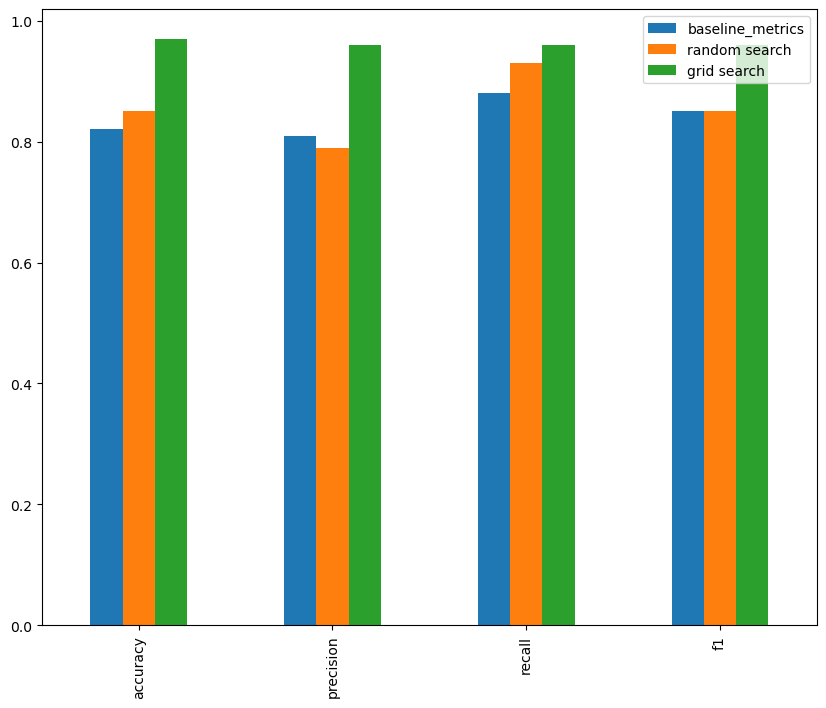

In [44]:
compare_metrics = pd.DataFrame(
    {
        'baseline_metrics': baseline_metrics,
        'random search': rs_metric,
        'grid search': gs_metric,
    }
)
compare_metrics.plot.bar(figsize=(10, 8))